# Lung Cancer treatment demo – Part 2

## Introduction

The requirement of the project is to scrape the treatment for patient diagnosed with lung cancer from the website "https://www.cancer.org/cancer/lung-cancer/treating-non-small-cell/by-stage.html", based on the size of the tumor. The requirements are:
    1. Stage of the cancer (of patient).
    2. Summary of Treatment Recommendation.
    3. Recommendation for Medicine (name) use.

The scope of part 2 of the project is treatment for for Non-Small Cell Lung Cancer (NSCLC), by Stage:
- Stage 1: size of tumor < 20mm
- Stage 2: size of tumor (20mm - 50mm)
- Stage 3: size of tumor > 50mm

## Content


### Website recommendation

Requese Google search urls -> visit each website urls -> look for keywords -> choose top 5 urls

In [1]:
import requests, re, time, operator, string
from collections import Counter
from selenium import webdriver
import numpy as np
from bs4 import BeautifulSoup, NavigableString, Tag

In [65]:
"""requese google research page with search term"""

def search_results(search_term, num_pages):    
    # deactivate Selenium browser from running
    options = webdriver.ChromeOptions()
    options.add_argument('headless')
    options.add_argument('window-size=1200x600')
    # run the Chrome browser
    browser = webdriver.Chrome(options=options)
    
    # reformat the search term ('non small cell' --> 'non+small+cell')
    final_search_term = '+'.join(search_term.split())
    
    final_results = []
    
    for num in range(num_pages):
        init_url = f'https://www.google.com/search?q={final_search_term}&sxsrf=ALeKk02hKro2QQ16XyfEojUhFAz0BwzMnA:1586679710309&ei=ns-SXvGjEruWjgau2JyIDQ&start={num}0&sa=N&ved=2ahUKEwjx6oTEuuLoAhU7i8MKHS4sB9EQ8tMDegQIDxAt&biw=1396&bih=686&dpr=1.38'
        browser.get(init_url)

#     # change language
#     change_language = browser.find_element_by_xpath("//*[@id='Rzn5id']/div/a[2]")
#     change_language.click()
        
        # get lists of all h3 tag 
        urls = browser.find_elements_by_xpath("//h3[@class='LC20lb DKV0Md']/parent::a")
    
        # get list of all urls (@href)
        results = []
        for url in urls:
            href = url.get_attribute("href")
            results.append(href)
        
        final_results.extend(results)
    browser.close()
        
    return list(set(final_results))

In [53]:
"""return the counts of keyword"""
def count_keyword(keyword, soup):
    words = soup.find_all(text=lambda text: keyword.lower() in text)
    return len(words)

In [450]:
"""check websites they contain all 'stage 1, stage 2, stage 3' pattern"""
def check_stage_url(text):
    stages1 = ['stage 1', 'stage i']
    stages2 = ['stage 2', 'stage ii']
    stages3 = ['stage 3', 'stage iii']
    for s1,s2,s3 in zip(stages1, stages2, stages3):
        if s1 and s2 and s3 in text:
            return True
    return False

In [70]:
"""return a nested dictionary: 
{keys: urls, 
 values:{keys: keyword
         values: count}} """
def dict_keyword(keywords, search_urls):
    keyword_url = {}
    for i, url in enumerate(search_urls):
        website = requests.get(url).text.lower()
        soup = BeautifulSoup(website, 'lxml')
        
        # check websites they contain all 'stage 1,2,3' pattern
        if check_stage_url(website) == False:
            continue
        
        values = {}
        for keyword in keywords:
            # if find patter 'non-small' or 'nsclc', get sum of their counts
            if keyword == 'non-small' or keyword == 'nsclc':
                keyword = 'non-small'
                count = count_keyword('non-small', soup) + count_keyword('nsclc', soup)
            else:   
                count = count_keyword(keyword, soup)

            values[keyword] = count
        
        # if counts of pattern 'non-small' & 'ncscl' < 10, skip that url
        if values['non-small'] < 10:
            continue
        else:
            keyword_url[i] = values
        
    return keyword_url

In [57]:
"""sort the counts by keywords"""
def sort_keyword(keyword_url):
    key = lambda x: (keyword_url[x]['stage'], keyword_url[x]['treatment'], keyword_url[x]['medicine'])
    sorted_key = sorted(keyword_url, key=key, reverse=True)

    sorted_url = {k:keyword_url[k] for k in sorted_key}
    
    return sorted_url

In [64]:
search_term = 'non small cell lung cancer treatment'

search_urls = search_results(search_term, num_pages=2)
search_urls

['https://www.cancer.gov/types/lung/patient/non-small-cell-lung-treatment-pdq',
 'https://www.dana-farber.org/non-small-cell-lung-cancer/treatment/',
 'https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3791496/',
 'https://www.cancer.net/cancer-types/lung-cancer-non-small-cell/types-treatment',
 'https://medlineplus.gov/ency/article/000122.htm',
 'https://www.macmillan.org.uk/cancer-information-and-support/lung-cancer/non-small-cell-lung-cancer',
 'https://www.cancer.gov/types/lung/hp/non-small-cell-lung-treatment-pdq',
 'https://www.cancerresearchuk.org/about-cancer/lung-cancer/treatment/non-small-cell-lung-cancer',
 'https://www.cancer.org/cancer/lung-cancer/treating-non-small-cell/by-stage.html',
 'https://emedicine.medscape.com/article/279960-treatment',
 'https://www.medicalnewstoday.com/articles/316477',
 'https://www.lungcancer.org/find_information/publications/163-lung_cancer_101/269-non_small_cell_lung_cancer_treatment',
 'https://www.cdc.gov/cancer/lung/basic_info/diagnosis_treatm

In [75]:
keywords = ['stage', 'treatment','medicine', 'non-small']
keyword_url = dict_keyword(keywords, search_urls)
keyword_url

{0: {'stage': 81, 'treatment': 114, 'medicine': 3, 'non-small': 74},
 1: {'stage': 9, 'treatment': 42, 'medicine': 0, 'non-small': 10},
 3: {'stage': 22, 'treatment': 61, 'medicine': 0, 'non-small': 49},
 6: {'stage': 252, 'treatment': 315, 'medicine': 2, 'non-small': 564},
 8: {'stage': 33, 'treatment': 62, 'medicine': 0, 'non-small': 59},
 9: {'stage': 95, 'treatment': 121, 'medicine': 30, 'non-small': 280},
 10: {'stage': 23, 'treatment': 15, 'medicine': 0, 'non-small': 20},
 11: {'stage': 3, 'treatment': 30, 'medicine': 1, 'non-small': 11},
 13: {'stage': 13, 'treatment': 28, 'medicine': 4, 'non-small': 23},
 16: {'stage': 8, 'treatment': 28, 'medicine': 4, 'non-small': 69},
 21: {'stage': 22, 'treatment': 39, 'medicine': 8, 'non-small': 86}}

In [76]:
sorted_url = sort_keyword(keyword_url)
sorted_url

{6: {'stage': 252, 'treatment': 315, 'medicine': 2, 'non-small': 564},
 9: {'stage': 95, 'treatment': 121, 'medicine': 30, 'non-small': 280},
 0: {'stage': 81, 'treatment': 114, 'medicine': 3, 'non-small': 74},
 8: {'stage': 33, 'treatment': 62, 'medicine': 0, 'non-small': 59},
 10: {'stage': 23, 'treatment': 15, 'medicine': 0, 'non-small': 20},
 3: {'stage': 22, 'treatment': 61, 'medicine': 0, 'non-small': 49},
 21: {'stage': 22, 'treatment': 39, 'medicine': 8, 'non-small': 86},
 13: {'stage': 13, 'treatment': 28, 'medicine': 4, 'non-small': 23},
 1: {'stage': 9, 'treatment': 42, 'medicine': 0, 'non-small': 10},
 16: {'stage': 8, 'treatment': 28, 'medicine': 4, 'non-small': 69},
 11: {'stage': 3, 'treatment': 30, 'medicine': 1, 'non-small': 11}}

In [82]:
search_urls = np.asarray(search_urls)
chosen_urls = search_urls[list(keyword_url.keys())[:5]]
for a in chosen_urls:
    print(a)

https://www.cancer.gov/types/lung/patient/non-small-cell-lung-treatment-pdq
https://www.dana-farber.org/non-small-cell-lung-cancer/treatment/
https://www.cancer.net/cancer-types/lung-cancer-non-small-cell/types-treatment
https://www.cancer.gov/types/lung/hp/non-small-cell-lung-treatment-pdq
https://www.cancer.org/cancer/lung-cancer/treating-non-small-cell/by-stage.html


synthetic function

In [451]:
def website_recommendation(search_term, keywords, num_pages, num_urls):
    search_urls = search_results(search_term, num_pages)
    search_urls = np.asarray(search_urls)
    
    keyword_url = dict_keyword(keywords, search_urls)
    sorted_url = sort_keyword(keyword_url)
    chosen_urls = search_urls[list(keyword_url.keys())[:num_urls]]
    
    return chosen_urls

In [452]:
search_term = 'non small cell lung cancer treatment'
keywords = ['stage', 'treatment','medicine', 'non-small']
num_pages = 10
num_urls = 5

### Scrape information of treatment 

find headers containing pattern 'stage ** -> scrape all texts between matched header and next header

In [83]:
"""get text between 2 headers"""
def find_text(header, name):
    text = []
    while True:
        header = header.nextSibling
        if header is None:
            break
        if isinstance(header, NavigableString):
            text.append(header.strip())
        if isinstance(header, Tag):
            if header.name == name:
                break
            text.append(header.get_text())
    
    return text

In [105]:
"""find headers that contain pattern ['stage [1,2,3,i,ii,iii]]"""
def find_stage(soup, stage):
    # regex if contains these pattern for each stage
    stage1 = "stage[a-z]* i[abc]* |stage[a-z]* 1[abc]*"
    stage2 = "stage[a-z]* ii[abc]* |stage[a-z]* 2[abc]*"
    stage3 = "stage[a-z]* iii[abc]* |stage[a-z]* 3[abc]*"
    
    if stage == 1:
        headers = soup.findAll(['h1','h2','h3'], text = re.compile(stage1))
    elif stage == 2:
        headers = soup.findAll(['h1','h2','h3'], text = re.compile(stage2))
    elif stage == 3:
        headers = soup.findAll(['h1','h2','h3'], text = re.compile(stage3))
    else:
        print('Invalid stage')
    
    # return headers with all matched paragraphs
    headers_dict = {}
    for h in headers:
        name = h.name
        text = find_text(h, name)
        
        headers_dict[name] = text
        
    return headers_dict

In [139]:
def get_text_by_stage(urls_list, stage):
    text = []
    for i, url in enumerate(urls_list):
        website = requests.get(url)
        soup = BeautifulSoup(website.text.lower(), 'lxml')

        url_text = find_stage(soup, stage)
        text.append(url_text)
        
    return text

In [142]:
stage1_raw = get_text_by_stage(chosen_urls, 1)
stage2_raw = get_text_by_stage(chosen_urls, 2)
stage3_raw = get_text_by_stage(chosen_urls, 3)

In [146]:
stage1_raw

[{'h3': ['treatment of stage ia non-small cell lung cancer and stage ib non-small cell lung cancer may include the following:',
   'surgery (wedge resection, segmental resection, sleeve resection, or lobectomy).\nexternal radiation therapy, including stereotactic body radiation therapy for patients who cannot have surgery or choose not to have surgery.\n\t\t\t a clinical trial of chemotherapy or radiation therapy following surgery.\n\t\t\t a clinical trial of treatment given through an endoscope, such as photodynamic therapy (pdt).\n\t\t\t a clinical trial of surgery followed by chemoprevention.',
   'use our clinical trial search to find nci-supported cancer clinical trials that are accepting patients. you can search for trials based on the type of cancer, the age of the patient, and where the trials are being done. general information  about clinical trials is also available.']},
 {},
 {},
 {'h2': ['',
   'standard treatment options for stages ia and ib nsclcstandard treatment  optio

In [147]:
stage2_raw

[{'h3': ['treatment of stage iia non-small cell lung cancer and stage iib non-small cell lung cancer may include the following:',
   'surgery (wedge resection, segmental resection, sleeve resection, lobectomy, or pneumonectomy).chemotherapy followed by surgery.surgery followed by chemotherapy.external radiation therapy for patients who cannot have surgery. a clinical trial of radiation therapy following surgery.\n\t\t\t ',
   'use our clinical trial search to find nci-supported cancer clinical trials that are accepting patients. you can search for trials based on the type of cancer, the age of the patient, and where the trials are being done. general information  about clinical trials is also available.']},
 {},
 {},
 {'h2': ['',
   'standard treatment options for stages iia and iib nsclcstandard treatment options for stages iia non-small cell lung cancer (nsclc) and iib nsclc include the following:surgery.adjuvant chemotherapy.neoadjuvant chemotherapy.radiation therapy (for patients w

In [148]:
stage3_raw

[{'h3': ['treatment of stage iiib non-small cell\n\t\t  lung cancer and stage iiic non-small cell lung cancer may include the following:',
   'chemotherapy followed by external radiation therapy.chemotherapy and radiation therapy given as separate treatments over the same period of time.chemotherapy and radiation therapy given as separate treatments over the same period of time, with the dose of radiation therapy increasing with time.chemotherapy and radiation therapy given  as separate treatments over the same period of time. chemotherapy alone is given before or after these treatments.chemotherapy and radiation therapy followed by immunotherapy with an immune checkpoint inhibitor, such as durvalumab.external radiation therapy alone for patients who cannot be treated with chemotherapy.external radiation therapy as palliative therapy, to relieve symptoms and improve the quality of life.laser therapy\n\t\t\t and/or internal radiation\n\t\t\t therapy to relieve symptoms and improve the q

### Preprocess text

In [194]:
def combine_text(stage_raw):
    text = []
    for t in stage_raw:
        if t != {}:
            values = list(t.values())[0]
            text.extend(values)
    
    text = ' '.join(text)
    
    return text

In [196]:
stage1_text = combine_text(stage1_raw)
stage2_text = combine_text(stage2_raw)
stage3_text = combine_text(stage3_raw)

In [198]:
stage1_text

'treatment of stage ia non-small cell lung cancer and stage ib non-small cell lung cancer may include the following: surgery (wedge resection, segmental resection, sleeve resection, or lobectomy).\nexternal radiation therapy, including stereotactic body radiation therapy for patients who cannot have surgery or choose not to have surgery.\n\t\t\t a clinical trial of chemotherapy or radiation therapy following surgery.\n\t\t\t a clinical trial of treatment given through an endoscope, such as photodynamic therapy (pdt).\n\t\t\t a clinical trial of surgery followed by chemoprevention. use our clinical trial search to find nci-supported cancer clinical trials that are accepting patients. you can search for trials based on the type of cancer, the age of the patient, and where the trials are being done. general information  about clinical trials is also available.  standard treatment options for stages ia and ib nsclcstandard treatment  options for stages ia non-small cell lung cancer (nsclc)

In [359]:
from nltk.corpus import stopwords, words
from gensim import corpora

stopwords_list = stopwords.words('english')
from spacy.lang.en.stop_words import STOP_WORDS

#### remove punctuation and stopwords

In [360]:
'''Make text lowercase, remove text in square brackets, 
    remove punctuation and remove words containing numbers.'''

def clean_text(text):    
    #remove text in square brackets
    text = re.sub('\[.*?\]', '', text)
    
    #remove punctuation
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    
    #remove \t \n
    text = re.sub('[\t\n]', '', text)
    text = re.sub('\xa0', '', text)
    
    #remove words containing number
    text = re.sub('\w*\d\w*', '', text)
    
    #remove stop words
    text = ' '.join([w for w in text.split() if (w not in STOP_WORDS) and w.isalpha() == True])

    return text

In [426]:
clean_stage1_text = clean_text(stage1_text)
clean_stage2_text = clean_text(stage2_text)
clean_stage3_text = clean_text(stage3_text)

#### stemming words

In [433]:
from nltk.stem import PorterStemmer 
from nltk.stem import WordNetLemmatizer

def lemmatize_word(text):
    lm = WordNetLemmatizer()
    return ' '.join([lm.lemmatize(w) for w in text.split()])

In [428]:
clean_stage1 = lemmatize_word(clean_stage1_text)
clean_stage2 = lemmatize_word(clean_stage2_text)
clean_stage3 = lemmatize_word(clean_stage3_text)

total_text = clean_stage1 + clean_stage2 + clean_stage3

In [432]:
len(clean_stage1), len(clean_stage2), len(clean_stage3)

(18946, 11503, 15984)

### Visualize text

In [434]:
# Look at the most common top words --> add them to the stop word list
from collections import Counter

counter = Counter(total_text.split())
counter.most_common()

[('patient', 159),
 ('cancer', 131),
 ('therapy', 130),
 ('radiation', 122),
 ('lung', 110),
 ('trial', 110),
 ('stage', 109),
 ('chemotherapy', 81),
 ('et', 76),
 ('al', 76),
 ('j', 59),
 ('p', 50),
 ('treatment', 49),
 ('surgery', 49),
 ('clinical', 45),
 ('survival', 42),
 ('oncol', 42),
 ('cell', 41),
 ('iii', 41),
 ('ci', 40),
 ('resection', 39),
 ('nsclc', 38),
 ('tumor', 36),
 ('hr', 36),
 ('nonsmallcell', 36),
 ('concurrent', 35),
 ('study', 34),
 ('phase', 34),
 ('nonsmall', 33),
 ('randomized', 32),
 ('result', 31),
 ('adjuvant', 30),
 ('ii', 28),
 ('benefit', 27),
 ('gy', 27),
 ('local', 26),
 ('treated', 26),
 ('group', 24),
 ('inoperable', 24),
 ('r', 24),
 ('versus', 23),
 ('radiotherapy', 23),
 ('clin', 23),
 ('compared', 22),
 ('postoperative', 21),
 ('carcinoma', 21),
 ('analysis', 20),
 ('o', 20),
 ('resected', 20),
 ('disease', 20),
 ('cisplatin', 20),
 ('option', 18),
 ('outcome', 18),
 ('metaanalysis', 18),
 ('control', 18),
 ('dose', 18),
 ('recurrence', 17),
 ('r

remove 'et', 'al', 'j' 'p' and 'patients', 'lung', 'cancer', 'stage'

In [439]:
clean_s1 = ' '.join([w for w in clean_stage1.split() if w not in ['et', 'al', 'j', 'p', 'patient', 'lung', 'cancer', 'stage']])
clean_s2 = ' '.join([w for w in clean_stage2.split() if w not in ['et', 'al', 'j', 'p', 'patient', 'lung', 'cancer', 'stage']])
clean_s3 = ' '.join([w for w in clean_stage3.split() if w not in ['et', 'al', 'j', 'p', 'patient', 'lung', 'cancer', 'stage']])

most common words by stage

stage1

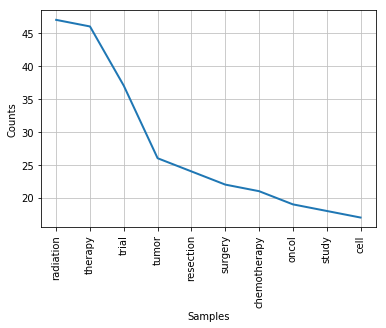

In [440]:
import matplotlib.pyplot as plt
from nltk import FreqDist

# most common words stage 1
FreqDist(clean_s1.split()).plot(10)

plt.show()

stage 2

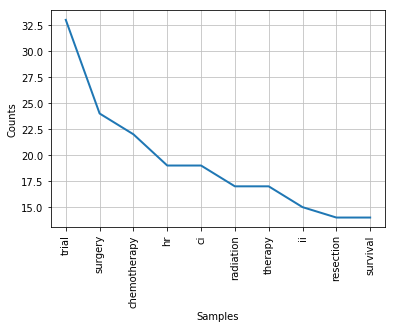

In [441]:
FreqDist(clean_s2.split()).plot(10)
plt.show()

stage 3

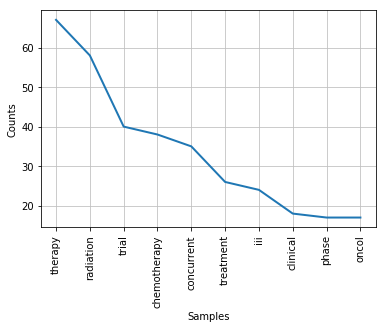

In [442]:
FreqDist(clean_s3.split()).plot(10)
plt.show()

### LDA model

#### stage 1

In [443]:
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer
from gensim import matutils, models
import scipy.sparse

cv = CountVectorizer()
data_cv = cv.fit_transform(clean_s1.split())
df_cv = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())

df_cv

,ablation,ablative,absolute,accelerated,accepting,account,accurate,achieved,acosog,addition,...,wh,whorefused,widely,winter,withthose,wright,year,yiannoutsos,yield,zell
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2070,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2071,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2072,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2073,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [444]:
# Create the gensim corpus
corpus = matutils.Sparse2Corpus(scipy.sparse.csr_matrix(df_cv.transpose()))

# Create the vocabulary dictionary
id2word = dict((v, k) for k, v in cv.vocabulary_.items())

2 topics

In [445]:
lda = models.LdaModel(corpus=corpus, num_topics=2, id2word=id2word, passes=80)
lda.print_topics()

[(0,
  '0.041*"therapy" + 0.025*"chemotherapy" + 0.023*"cell" + 0.019*"test" + 0.019*"removed" + 0.014*"adjuvant" + 0.013*"stereotactic" + 0.012*"body" + 0.012*"trial" + 0.011*"small"'),
 (1,
  '0.077*"surgery" + 0.053*"radiation" + 0.026*"option" + 0.022*"tumor" + 0.019*"study" + 0.018*"treatment" + 0.015*"sbrt" + 0.014*"risk" + 0.013*"use" + 0.013*"determine"')]

3 topics

In [446]:
lda = models.LdaModel(corpus=corpus, num_topics=3, id2word=id2word, passes=80)
lda.print_topics()

[(0,
  '0.043*"option" + 0.031*"study" + 0.030*"adjuvant" + 0.030*"treatment" + 0.025*"sbrt" + 0.022*"use" + 0.021*"type" + 0.021*"factor" + 0.021*"problem" + 0.021*"followed"'),
 (1,
  '0.073*"surgery" + 0.050*"radiation" + 0.029*"chemotherapy" + 0.023*"test" + 0.023*"removed" + 0.014*"trial" + 0.012*"determine" + 0.012*"pattern" + 0.012*"second" + 0.012*"having"'),
 (2,
  '0.086*"therapy" + 0.049*"cell" + 0.036*"tumor" + 0.027*"stereotactic" + 0.025*"body" + 0.024*"risk" + 0.022*"small" + 0.021*"location" + 0.020*"lower" + 0.011*"local"')]

4 topics

In [447]:
lda = models.LdaModel(corpus=corpus, num_topics=4, id2word=id2word, passes=80)
lda.print_topics()

[(0,
  '0.041*"chemotherapy" + 0.023*"treatment" + 0.020*"sbrt" + 0.018*"small" + 0.017*"pattern" + 0.016*"people" + 0.016*"checked" + 0.016*"certain" + 0.016*"radiofrequency" + 0.016*"margin"'),
 (1,
  '0.051*"test" + 0.039*"study" + 0.035*"stereotactic" + 0.031*"body" + 0.030*"trial" + 0.030*"risk" + 0.027*"use" + 0.026*"type" + 0.026*"second" + 0.026*"factor"'),
 (2,
  '0.145*"surgery" + 0.099*"radiation" + 0.045*"removed" + 0.041*"tumor" + 0.024*"location" + 0.023*"having" + 0.023*"followed" + 0.011*"nonsmallcell" + 0.011*"nonsmall" + 0.011*"outcome"'),
 (3,
  '0.105*"therapy" + 0.060*"cell" + 0.052*"option" + 0.036*"adjuvant" + 0.026*"determine" + 0.025*"health" + 0.025*"problem" + 0.019*"resection" + 0.015*"oncol" + 0.012*"phase"')]

### Summarization

In [448]:
stage1_summ = re.sub('[\t\n]', '', stage1_text)
stage1_summ = re.sub('\xa0', '', stage1_summ)
#remove words containing number
stage1_summ = re.sub('\w*\d\w*', '', stage1_summ)
#remove text in square brackets
stage1_summ = re.sub('\[.*?\]', '', stage1_summ)

In [449]:
from gensim.summarization.summarizer import summarize

summarize(stage1_summ, word_count=100)

'there was no interaction between chemotherapy effect and any of the following:sex.age.histology.type of surgery.planned radiation therapy.planned total dose of cisplatin.several other randomized controlled trials and meta-analyses have evaluated the use of  postoperative chemotherapy in patients with stages i, ii, and iiia nsclc.although there is sufficient evidence that postoperative chemotherapy is effective in patients with stage ii or stage iiia nsclc, its usefulness  in patients with stage ib nsclc is less clear.evidence (adjuvant chemotherapy for stage ib nsclc):the cancer and leukemia group b study (calgb- ) addressed the results of adjuvant carboplatin and paclitaxel versus observation for  os in  patients with resected stage ib (i.e., pathological , ) nsclc.\nint j radiat oncol biol phys  (): -, .baumann p, nyman j, hoyer m, et al.: outcome in a prospective phase ii trial of medically inoperable stage i non-small-cell lung cancer patients treated with stereotactic body radiot

In [410]:
from gensim.summarization import keywords

clean_s1
keywords(clean_s1, words=20).split('\n')

['trials',
 'resection',
 'resections',
 'resectable',
 'therapies',
 'radiat',
 'tumor',
 'tumors',
 'surgery',
 'radiation therapy including',
 'resected adjuvant',
 'clinical trial chemotherapy',
 'treatment',
 'treatments',
 'studied',
 'survival',
 'results',
 'resulted',
 'treated',
 'treating',
 'studies comparing',
 'study group',
 'compared',
 'comparable',
 'comparative',
 'nsclc',
 'outcomes',
 'outcome',
 'clinically',
 'radiotherapy',
 'include',
 'groups']

### Sequence2sequence model

In [379]:
import keras
from keras.preprocessing import sequence
from keras.utils import np_utils
import random, sys

from keras.models import Sequential
from keras.layers.core import Dense, Activation, Dropout, RepeatVector
from keras.layers.wrappers import TimeDistributed
from keras.layers.recurrent import LSTM
from keras.layers.embeddings import Embedding
from keras.regularizers import l2

In [453]:
file = 'glove.6B.300d.txt'